# Tema 5: Diferencias Temporales

Para ejecutar apropiadamente este notebook, debes tener instalados los siguientes paquetes:

`gym`

Además, debes asegurarte de descargar los siguientes paquetes de soporte:

`Utilidades_T5.py`

Si utilizas Google Colab, para instalar los paquetes, debe bastar con hacer:

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Asegúrate de poner la ruta de tu carpeta de Drive

In [2]:
# Esta debe ser una ruta en común
%cd drive/MyDrive
# Aquí viene tu ruta particular
%cd 6.8\ Reinforcement\ Learning\ \ \ Data\ Science\ Jr/0\ -\ Experto/Notebooks
%pwd

/content/drive/MyDrive
/content/drive/.shortcut-targets-by-id/1KDgMXJvr49d5x0phdBg5Sgrk7akf4y6y/6.8 Reinforcement Learning   Data Science Jr/0 - Experto/Notebooks


'/content/drive/.shortcut-targets-by-id/1KDgMXJvr49d5x0phdBg5Sgrk7akf4y6y/6.8 Reinforcement Learning   Data Science Jr/0 - Experto/Notebooks'

In [3]:
!pip install gym
!pip install pygame

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 21.8 MB 1.8 MB/s 


In [4]:
import os
os.environ["SDL_VIDEODRIVER"] = "dummy"

import gym
import Utilidades_T5 as uti
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import random

## Implementación de los algoritmos

In [5]:
def epsilon_greedy_policy(env, Q, state, epsilon=0.1):
    # Select action with Epsilon-Greedy Algorithm
    if random.uniform(0, 1) < epsilon:
        return env.action_space.sample()
    else:
        Q_list = [Q[(state, act)] for act in range(env.action_space.n)]
        return random.choice([ind for ind, x in enumerate(Q_list) if x == max(Q_list)])

In [6]:
def sarsa(env, gamma=0.9, epsilon=0.1, alpha=0.618, num_episodes=1000, Q=None):
    if Q is None:
        Q = {(state, action): 0
             for state in range(env.observation_space.n)
             for action in range(env.action_space.n)}
    G_history = []
    G_prom_hist = []

    for ep_count in range(num_episodes):
        done = False
        G = 0
        # State
        state = env.reset()
        # Action
        action = epsilon_greedy_policy(env, Q, state, epsilon)
        step = 1

        while not done:
            step += 1

            # Reward & State'
            next_state, reward, done, _ = env.step(action)

            # Action'
            next_action = epsilon_greedy_policy(env, Q, state, epsilon)

            # Update rule
            Q[(state, action)] += alpha * (reward + gamma * Q[(next_state, next_action)] - Q[(state, action)])

            G += reward
            state = next_state
            action = next_action

        G_history.append(G)
        G_prom_hist.append(G / step)

        if ep_count % (num_episodes // 10) == 0:
            print(f"Episodio {ep_count}, Recompensa total: {G}",
                  f"Recompensa promedio: {np.array(G_history).mean()} ")

    env.close()

    return Q, G_history, G_prom_hist

In [7]:
def q_learning(env, gamma=0.9, epsilon=0.1, alpha=0.618, num_episodes=1000, Q=None):
    if Q is None:
        Q = {(state, action): 0
             for state in range(env.observation_space.n)
             for action in range(env.action_space.n)}
    G_history = []
    G_prom_hist = []

    for ep_count in range(num_episodes):
        done = False
        G = 0
        step = 1

        # Generate a trajectory
        state = env.reset()
        while not done:
            step += 1

            action = epsilon_greedy_policy(env, Q, state, epsilon)

            next_state, reward, done, _ = env.step(action)

            Q_list_next_state = [Q[(next_state, act)] for act in range(env.action_space.n)]

            # Update rule
            Q[(state, action)] += alpha * (reward + gamma * np.max(Q_list_next_state) - Q[(state, action)])

            G += reward
            state = next_state

        G_history.append(G)
        G_prom_hist.append(G / step)

        if ep_count % (num_episodes // 10) == 0:
            print(f"Episodio {ep_count}, Recompensa total: {G}",
                  f"Recompensa promedio: {np.array(G_history).mean()} ")

    env.close()

    return Q, G_history, G_prom_hist

In [8]:
def expected_sarsa(env, gamma=0.9, epsilon=0.1, alpha=0.618, num_episodes=1000, Q=None):
    if Q is None:
        Q = {(state, action): 0
             for state in range(env.observation_space.n)
             for action in range(env.action_space.n)}
    G_history = []
    G_prom_hist = []

    for ep_count in range(num_episodes):
        done = False
        G = 0
        step = 1

        # State
        state = env.reset()
        while not done:
            step += 1

            # Action
            action = epsilon_greedy_policy(env, Q, state, epsilon)

            # Reward & State'
            next_state, reward, done, _ = env.step(action)

            # Expected Q
            Q_list_next_state = [Q[(next_state, act)] for act in range(env.action_space.n)]
            best_action = random.choice([ind for ind, x in enumerate(Q_list_next_state) if x == max(Q_list_next_state)])

            probabilities = [epsilon / env.action_space.n] * env.action_space.n
            probabilities[best_action] += 1 - epsilon

            Q_expected = np.dot(probabilities, Q_list_next_state)

            # Update rule
            Q[(state, action)] += alpha * (reward + gamma * Q_expected - Q[(state, action)])

            G += reward
            state = next_state

        G_history.append(G)
        G_prom_hist.append(G / step)

        if ep_count % (num_episodes // 10) == 0:
            print(f"Episodio {ep_count}, Recompensa total: {G}",
                  f"Recompensa promedio: {np.array(G_history).mean()} ")

    env.close()

    return Q, G_history, G_prom_hist

In [9]:
def double_q_learning(env, gamma=0.9, epsilon=0.1, alpha=0.618, num_episodes=1000, Q=None):
    if Q is None:
        Q = {(state, action): 0
             for state in range(env.observation_space.n)
             for action in range(env.action_space.n)}
    Q1 = {(state, action): Q[(state, action)]
         for state in range(env.observation_space.n)
         for action in range(env.action_space.n)}
    Q2 = {(state, action): Q[(state, action)]
          for state in range(env.observation_space.n)
          for action in range(env.action_space.n)}
    G_history = []
    G_prom_hist = []

    for ep_count in range(num_episodes):
        done = False
        G = 0
        step = 1

        # Generate a trajectory
        state = env.reset()
        while not done:
            step += 1

            # Epsilon-greedy policy in Q1 + Q2
            if random.uniform(0, 1) < epsilon:
                action = env.action_space.sample()
            else:
                Q_list = [Q1[(state, act)] + Q2[(state, act)] for act in range(env.action_space.n)]
                action = random.choice([ind for ind, x in enumerate(Q_list) if x == max(Q_list)])

            next_state, reward, done, _ = env.step(action)

            # Update rule
            if random.uniform(0, 1) < 0.5:
                Q_list_next_state = [Q2[(next_state, act)] for act in range(env.action_space.n)]
                Q1[(state, action)] += alpha * (reward + gamma * np.max(Q_list_next_state) - Q1[(state, action)])
            else:
                Q_list_next_state = [Q1[(next_state, act)] for act in range(env.action_space.n)]
                Q2[(state, action)] += alpha * (reward + gamma * np.max(Q_list_next_state) - Q2[(state, action)])

            G += reward
            state = next_state

        G_history.append(G)
        G_prom_hist.append(G / step)

        if ep_count % (num_episodes // 10) == 0:
            print(f"Episodio {ep_count}, Recompensa total: {G}",
                  f"Recompensa promedio: {np.array(G_history).mean()} ")

    env.close()

    return (Q1, Q2), G_history, G_prom_hist

## Ejemplo Cliff Walking

Ejecutamos los algoritmos

In [10]:
# Definimos el entorno para la simulación
np.random.seed(123)
entorno = gym.make('CliffWalking-v0')

# Establecemos los parámetros
parameters = dict(gamma=1, alpha=0.5, epsilon=0.01, num_episodes=5000)

# Corremos cada simulación
print("\nSARSA:")
Q_sarsa, G_history_sarsa, G_prom_sarsa = sarsa(entorno, **parameters)
print("\nQ-Learning:")
Q_qlearn, G_history_qlearn, G_prom_qlearn = q_learning(entorno, **parameters)
print("\nExpected SARSA:")
Q_esarsa, G_history_esarsa, G_prom_esarsa = expected_sarsa(entorno, **parameters)
print("\nDouble Q-Learning:")
Q_dqlearn, G_history_dqlearn, G_prom_dqlearn = double_q_learning(entorno, **parameters)


/usr/local/lib/python3.7/dist-packages/gym/core.py:318: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."
/usr/local/lib/python3.7/dist-packages/gym/wrappers/step_api_compatibility.py:40: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."



SARSA:
Episodio 0, Recompensa total: -4858 Recompensa promedio: -4858.0 
Episodio 500, Recompensa total: -19 Recompensa promedio: -83.04790419161677 
Episodio 1000, Recompensa total: -25 Recompensa promedio: -56.44955044955045 
Episodio 1500, Recompensa total: -19 Recompensa promedio: -47.42704863424384 
Episodio 2000, Recompensa total: -19 Recompensa promedio: -47.23488255872064 
Episodio 2500, Recompensa total: -19 Recompensa promedio: -44.09436225509796 
Episodio 3000, Recompensa total: -19 Recompensa promedio: -46.04498500499833 
Episodio 3500, Recompensa total: -19 Recompensa promedio: -43.400742644958584 
Episodio 4000, Recompensa total: -52 Recompensa promedio: -44.67633091727068 
Episodio 4500, Recompensa total: -20 Recompensa promedio: -42.75849811153077 

Q-Learning:
Episodio 0, Recompensa total: -1567 Recompensa promedio: -1567.0 
Episodio 500, Recompensa total: -13 Recompensa promedio: -21.698602794411176 
Episodio 1000, Recompensa total: -13 Recompensa promedio: -18.36463

Graficamos los resultados

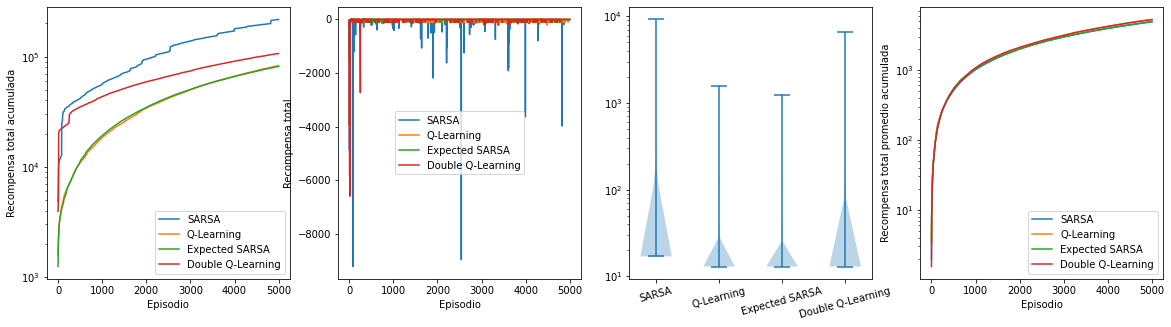

In [11]:
fi, ax = plt.subplots(1, 4, figsize=(20, 5))

gh_sarsa = np.array(G_history_sarsa)
gh_qlearn = np.array(G_history_qlearn)
gh_esarsa = np.array(G_history_esarsa)
gh_dqlearn = np.array(G_history_dqlearn)

ax[0].semilogy(np.cumsum(-gh_sarsa), label='SARSA')
ax[0].semilogy(np.cumsum(-gh_qlearn), label='Q-Learning')
ax[0].semilogy(np.cumsum(-gh_esarsa), label='Expected SARSA')
ax[0].semilogy(np.cumsum(-gh_dqlearn), label='Double Q-Learning')
ax[0].set_xlabel("Episodio")
ax[0].set_ylabel("Recompensa total acumulada")
ax[0].legend()

ax[1].plot(gh_sarsa, label='SARSA')
ax[1].plot(gh_qlearn, label='Q-Learning')
ax[1].plot(gh_esarsa, label='Expected SARSA')
ax[1].plot(gh_dqlearn, label='Double Q-Learning')
ax[1].set_xlabel("Episodio")
ax[1].set_ylabel("Recompensa total")
# ax[1].set_ylim((300, 0))
ax[1].legend()

ax[2].violinplot([-gh_sarsa, -gh_qlearn, -gh_esarsa, -gh_dqlearn])
ax[2].set_yscale("log")
ax[2].set_xticks([1, 2, 3, 4])
ax[2].set_xticklabels(["SARSA", "Q-Learning", "Expected SARSA", "Double Q-Learning"], rotation=15)

ax[3].semilogy(-np.array(G_prom_sarsa).cumsum(), label='SARSA')
ax[3].semilogy(-np.array(G_prom_qlearn).cumsum(), label='Q-Learning')
ax[3].semilogy(-np.array(G_prom_esarsa).cumsum(), label='Expected SARSA')
ax[3].semilogy(-np.array(G_prom_dqlearn).cumsum(), label='Double Q-Learning')
ax[3].set_xlabel("Episodio")
ax[3].set_ylabel("Recompensa total promedio acumulada")
# ax[1].set_ylim((300, 0))
ax[3].legend()

plt.show()

SARSA


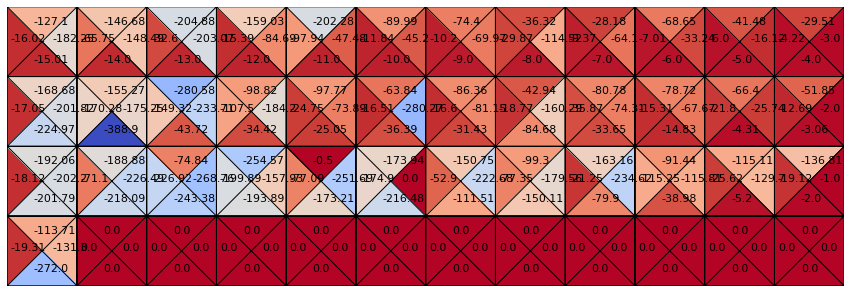

Q-Learning


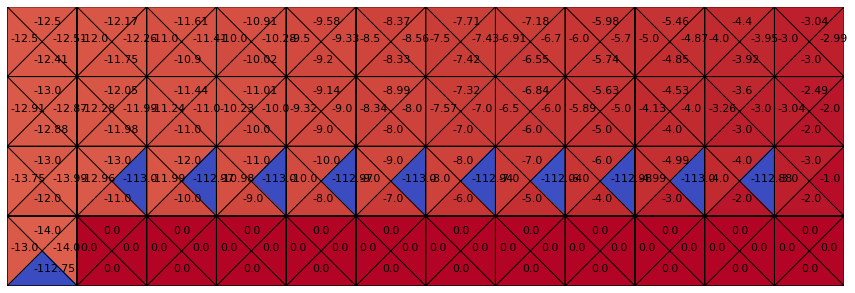

Expected SARSA


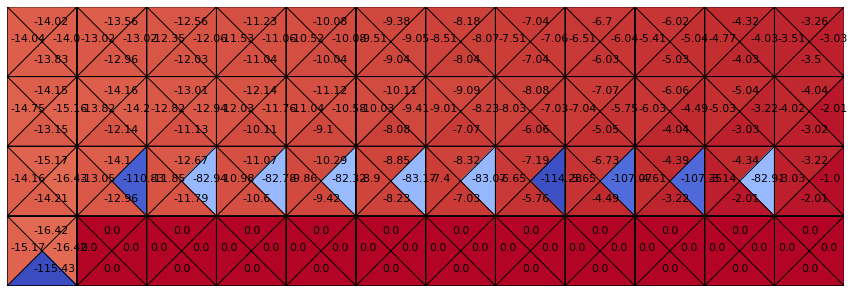

Double Q-Learning


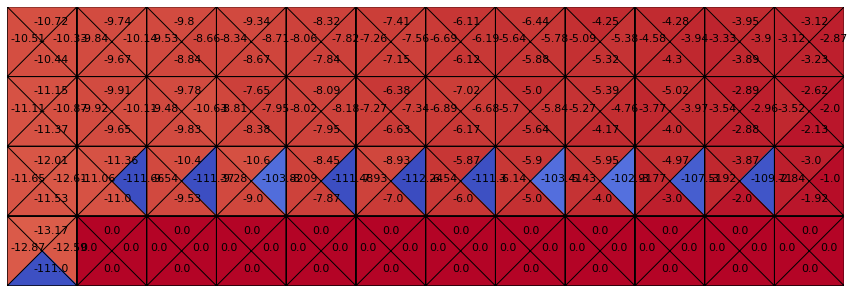

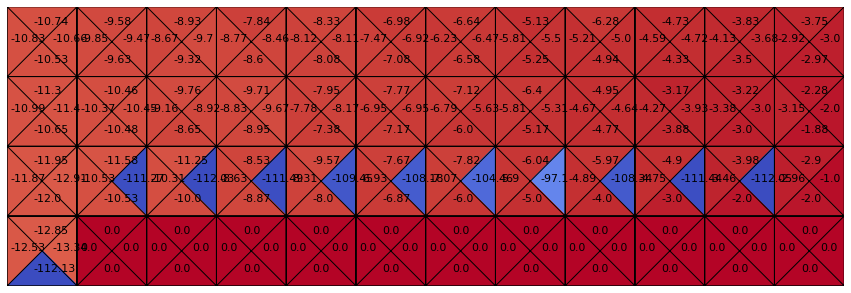

In [12]:
dimensiones = (4, 12)
fig_size = (15, 8)
print("SARSA")
uti.plot_action_value_grid(Q_sarsa, dimensiones, fig_size)

print("Q-Learning")
uti.plot_action_value_grid(Q_qlearn, dimensiones, fig_size)

print("Expected SARSA")
uti.plot_action_value_grid(Q_esarsa, dimensiones, fig_size)

print("Double Q-Learning")
uti.plot_action_value_grid(Q_dqlearn[0], dimensiones, fig_size)
uti.plot_action_value_grid(Q_dqlearn[1], dimensiones, fig_size)

## Frozen Lake

In [13]:
mapa = [
    'SFFFF',
    'FFFFF',
    'FFFHF',
    'FFFFF',
    'FFGFF'
]
dimensiones = (len(mapa), len(mapa[0]))

Probamos uno de los algoritmos

In [14]:
# Definimos el entorno para la simulación
np.random.seed(123)
entorno = gym.make('FrozenLake-v1', desc=mapa, is_slippery=True)
# entorno = gym.make('Taxi-v3')

Q_init = uti.obtener_Q_inicial(entorno)

#Q_sarsa, G_history_sarsa, G_prom_sarsa = sarsa(entorno, gamma=1, alpha=0.5, epsilon=0.1, num_episodes=2000, Q=Q_init)
Q_qlearn, G_history_qlearn, G_prom_qlearn = q_learning(entorno, gamma=1, alpha=0.5, epsilon=0.01, num_episodes=1000, Q=Q_init)

/usr/local/lib/python3.7/dist-packages/gym/core.py:318: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."
/usr/local/lib/python3.7/dist-packages/gym/wrappers/step_api_compatibility.py:40: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."


Episodio 0, Recompensa total: 1.0 Recompensa promedio: 1.0 
Episodio 100, Recompensa total: 0.0 Recompensa promedio: 0.5643564356435643 
Episodio 200, Recompensa total: 1.0 Recompensa promedio: 0.6766169154228856 
Episodio 300, Recompensa total: 1.0 Recompensa promedio: 0.6976744186046512 
Episodio 400, Recompensa total: 0.0 Recompensa promedio: 0.7007481296758105 
Episodio 500, Recompensa total: 1.0 Recompensa promedio: 0.718562874251497 
Episodio 600, Recompensa total: 1.0 Recompensa promedio: 0.7337770382695508 
Episodio 700, Recompensa total: 1.0 Recompensa promedio: 0.7432239657631954 
Episodio 800, Recompensa total: 1.0 Recompensa promedio: 0.7602996254681648 
Episodio 900, Recompensa total: 1.0 Recompensa promedio: 0.7758046614872364 


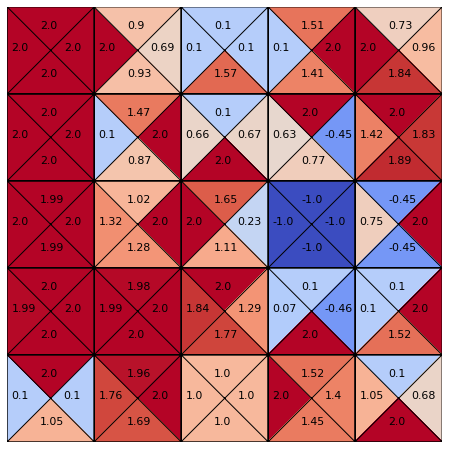

In [15]:
#uti.plot_action_value_grid(Q_sarsa, dimensiones)
uti.plot_action_value_grid(Q_qlearn, dimensiones)

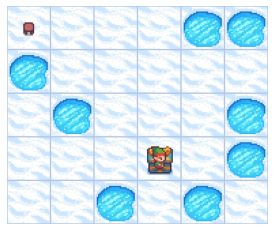

In [25]:
entorno = gym.make('FrozenLake-v1', desc=mapa, is_slippery=True)

entorno.reset()
# uti.mostrar(entorno)

uti.ejecutar_juego(entorno, lambda state: epsilon_greedy_policy(entorno, Q_qlearn, state, epsilon=0.1), 100)

## Taxi

In [26]:
np.random.seed(123)
entorno = gym.make('Taxi-v3')

Q_dqlearn, G_history_dqlearn, G_prom_dqlearn = double_q_learning(entorno, gamma=1, alpha=0.5, epsilon=0.1, num_episodes=2000)

Episodio 0, Recompensa total: -587 Recompensa promedio: -587.0 
Episodio 200, Recompensa total: -254 Recompensa promedio: -262.70646766169153 
Episodio 400, Recompensa total: -281 Recompensa promedio: -222.6857855361596 
Episodio 600, Recompensa total: -153 Recompensa promedio: -169.0332778702163 
Episodio 800, Recompensa total: 2 Recompensa promedio: -130.57677902621722 
Episodio 1000, Recompensa total: -7 Recompensa promedio: -104.6933066933067 
Episodio 1200, Recompensa total: 11 Recompensa promedio: -87.01665278934222 
Episodio 1400, Recompensa total: 2 Recompensa promedio: -74.40899357601712 
Episodio 1600, Recompensa total: -3 Recompensa promedio: -64.92692067457838 
Episodio 1800, Recompensa total: 4 Recompensa promedio: -57.521377012770685 


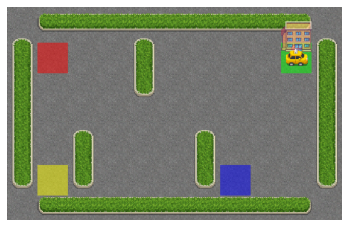

In [27]:
entorno.reset()

uti.ejecutar_juego(entorno, lambda state: epsilon_greedy_policy(entorno, Q_dqlearn[0], state, epsilon=0.1), 100)

Ejercicio

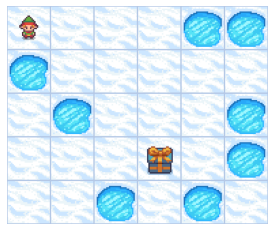

In [19]:
# Definimos el entorno para la simulación
mapa = [
    'SFFFHH',
    'HFFFFF',
    'FHFFFH',
    'FFFGFH',
    'FFHFHF'
]
dimensiones = (len(mapa), len(mapa[0]))

np.random.seed(123)
entorno = gym.make('FrozenLake-v1', desc=mapa, is_slippery=True)
entorno.reset()

uti.mostrar(entorno)

In [20]:
Q_init = uti.obtener_Q_inicial(entorno)

parameters = dict(
    gamma=1,
    alpha=0.6,
    epsilon=0.01,
    num_episodes=10000,
    Q=Q_init
)

print("\nSARSA:")
Q_sarsa, G_history_sarsa, G_prom_sarsa = sarsa(entorno, **parameters)
print("\nQ-Learning:")
Q_qlearn, G_history_qlearn, G_prom_sarsa = q_learning(entorno, **parameters)
print("\nExpected SARSA:")
Q_esarsa, G_history_esarsa, G_prom_sarsa = expected_sarsa(entorno, **parameters)
print("\nDouble Q-Learning:")
Q_dqlearn, G_history_dqlearn, G_prom_sarsa = double_q_learning(entorno, **parameters)



SARSA:
Episodio 0, Recompensa total: 0.0 Recompensa promedio: 0.0 
Episodio 1000, Recompensa total: 0.0 Recompensa promedio: 0.11488511488511488 
Episodio 2000, Recompensa total: 0.0 Recompensa promedio: 0.12293853073463268 
Episodio 3000, Recompensa total: 0.0 Recompensa promedio: 0.12495834721759413 
Episodio 4000, Recompensa total: 0.0 Recompensa promedio: 0.12421894526368409 
Episodio 5000, Recompensa total: 0.0 Recompensa promedio: 0.12037592481503699 
Episodio 6000, Recompensa total: 1.0 Recompensa promedio: 0.12181303116147309 
Episodio 7000, Recompensa total: 0.0 Recompensa promedio: 0.12141122696757606 
Episodio 8000, Recompensa total: 1.0 Recompensa promedio: 0.1229846269216348 
Episodio 9000, Recompensa total: 1.0 Recompensa promedio: 0.1225419397844684 

Q-Learning:
Episodio 0, Recompensa total: 0.0 Recompensa promedio: 0.0 
Episodio 1000, Recompensa total: 1.0 Recompensa promedio: 0.8261738261738262 
Episodio 2000, Recompensa total: 1.0 Recompensa promedio: 0.807596201899

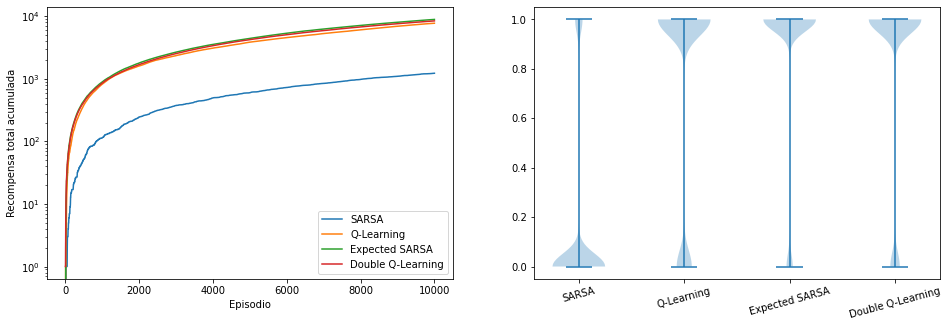

In [21]:
fi, ax = plt.subplots(1, 2, figsize=(16, 5))

gh_sarsa = np.array(G_history_sarsa)
gh_qlearn = np.array(G_history_qlearn)
gh_esarsa = np.array(G_history_esarsa)
gh_dqlearn = np.array(G_history_dqlearn)

ax[0].semilogy(np.cumsum(gh_sarsa), label='SARSA')
ax[0].semilogy(np.cumsum(gh_qlearn), label='Q-Learning')
ax[0].semilogy(np.cumsum(gh_esarsa), label='Expected SARSA')
ax[0].semilogy(np.cumsum(gh_dqlearn), label='Double Q-Learning')
ax[0].set_xlabel("Episodio")
ax[0].set_ylabel("Recompensa total acumulada")
ax[0].legend()

# ax[1].plot(gh_sarsa, label='SARSA')
# ax[1].plot(gh_qlearn, label='Q-Learning')
# ax[1].plot(gh_esarsa, label='Expected SARSA')
# ax[1].plot(gh_dqlearn, label='Double Q-Learning')
# ax[1].set_xlabel("Episodio")
# ax[1].set_ylabel("Recompensa total")
# # ax[1].set_ylim((300, 0))
# ax[1].legend()

ax[1].violinplot([gh_sarsa, gh_qlearn, gh_esarsa, gh_dqlearn])
# ax[2].set_yscale("log")
ax[1].set_xticks([1, 2, 3, 4])
ax[1].set_xticklabels(["SARSA", "Q-Learning", "Expected SARSA", "Double Q-Learning"], rotation=15)

plt.show()

SARSA


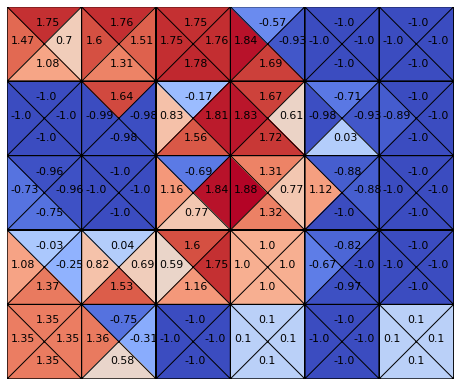

Q-Learning


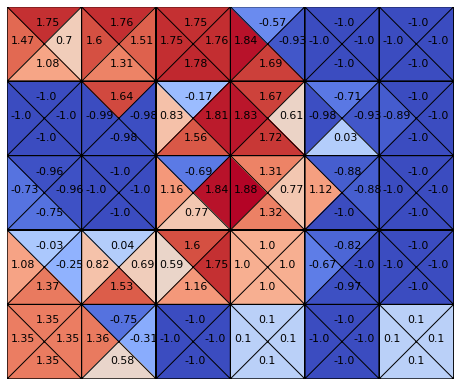

Expected SARSA


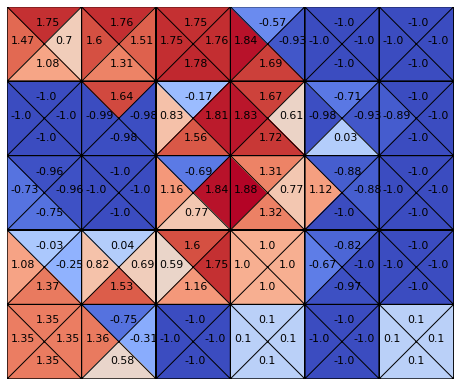

Double Q-Learning


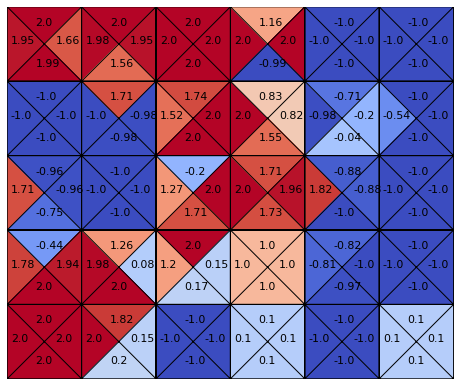

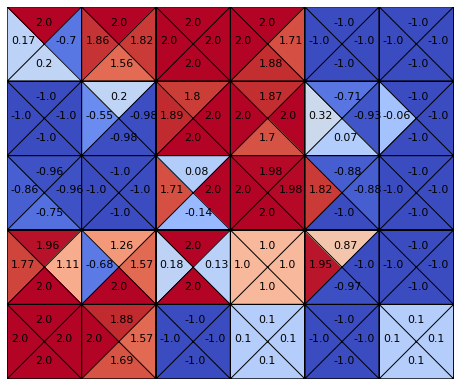

In [22]:
print("SARSA")
uti.plot_action_value_grid(Q_sarsa, dimensiones)

print("Q-Learning")
uti.plot_action_value_grid(Q_qlearn, dimensiones)

print("Expected SARSA")
uti.plot_action_value_grid(Q_esarsa, dimensiones)

print("Double Q-Learning")
uti.plot_action_value_grid(Q_dqlearn[0], dimensiones)
uti.plot_action_value_grid(Q_dqlearn[1], dimensiones)
